In [121]:
import pandas as pd
import numpy as np
import statsmodels.regression as sr
import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(context='notebook', style='whitegrid', font_scale=1.2)

In [2]:
df = pd.read_csv('/Users/evelynjohnson/Desktop/METIS/Linear_Regression/Project/Final_Data.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.head();
df.keys()

Index(['Project Title', 'Funding', 'Project We Love Tag', 'Number of Backers',
       'Monetary Goal', 'Number of Pledge-Reward Options',
       'Number of Backers for Lowest Pledge',
       'Number of Backers for Highest Pledge', 'Length of Funding Period',
       'Video Present', 'Northeast', 'Southeast', 'Southwest', 'West',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Technology', 'Theater'],
      dtype='object')

In [5]:
correlations = df.corr()
correlations = correlations.round(2)

<AxesSubplot:>

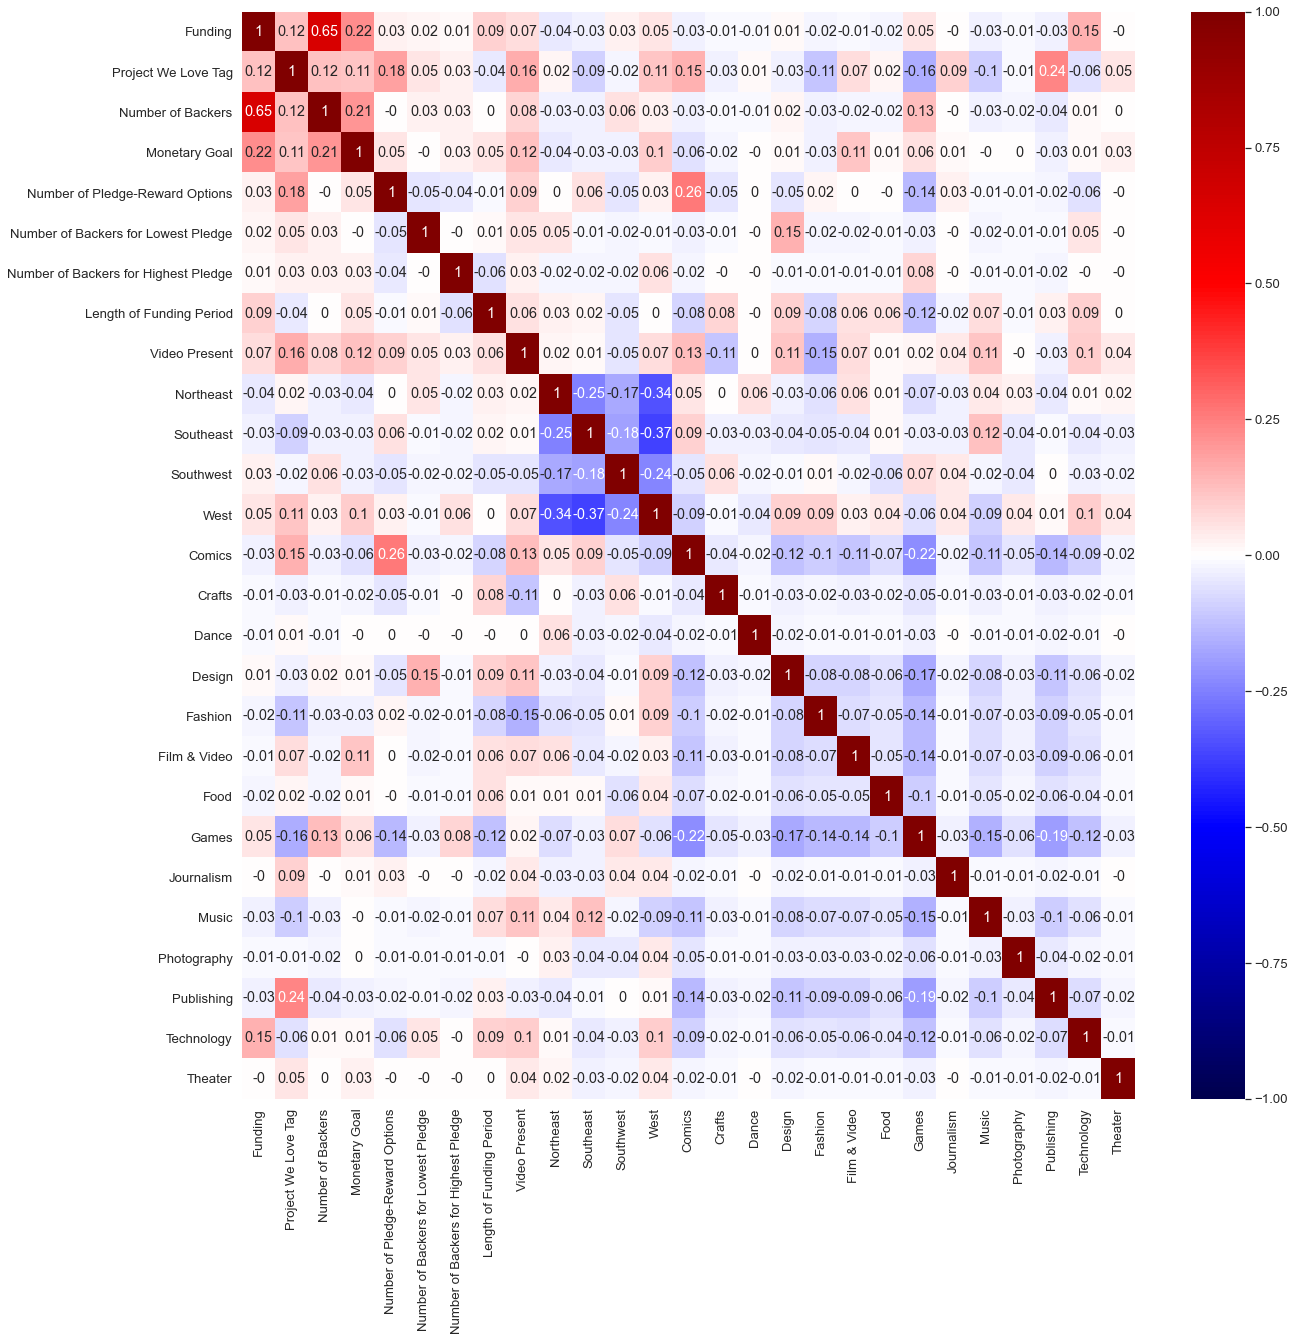

In [6]:
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlations, cmap="seismic", annot=True, vmin=-1, vmax=1)

In [7]:
num_features_target = ['Funding', 'Project We Love Tag', 'Number of Backers',
       'Monetary Goal', 'Number of Pledge-Reward Options',
       'Number of Backers for Lowest Pledge',
       'Number of Backers for Highest Pledge', 'Length of Funding Period',
       'Video Present']
num_df = df[num_features_target]
num_df.head()

,Funding,Project We Love Tag,Number of Backers,Monetary Goal,Number of Pledge-Reward Options,Number of Backers for Lowest Pledge,Number of Backers for Highest Pledge,Length of Funding Period,Video Present
0,1329,0,53,900,6,3,20,23,0
1,5546,1,56,5000,6,2,18,30,1
2,1835,0,29,1500,3,0,10,42,1
3,5989,0,247,1500,8,5,62,20,1
4,30638,0,218,15000,7,3,12,20,1


In [8]:
df.describe()

,Funding,Project We Love Tag,Number of Backers,Monetary Goal,Number of Pledge-Reward Options,Number of Backers for Lowest Pledge,Number of Backers for Highest Pledge,Length of Funding Period,Video Present,Northeast,...,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
count,1.080000e+03,1080.000000,1080.000000,1080.000000,1080.000000,1.080000e+03,1.080000e+03,1080.000000,1080.000000,1080.000000,...,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000,1080.000000
mean,5.643883e+04,0.237963,466.328704,9060.103704,8.932407,2.138310e+07,1.411717e+07,30.026852,0.646296,0.189815,...,0.062037,0.064815,0.031481,0.231481,0.002778,0.070370,0.012963,0.111111,0.042593,0.002778
std,4.944302e+05,0.426034,2805.593814,33843.148203,6.219649,3.263988e+08,3.095999e+08,10.911227,0.478340,0.392336,...,0.241335,0.246313,0.174696,0.421975,0.052656,0.255889,0.113167,0.314415,0.202030,0.052656
min,1.400000e+02,0.000000,2.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.799500e+03,0.000000,47.000000,1000.000000,5.000000,3.000000e+00,2.000000e+00,25.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.502500e+03,0.000000,111.000000,3997.500000,8.000000,1.150000e+01,1.000000e+01,30.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.077125e+04,0.000000,284.500000,10000.000000,11.000000,6.600000e+01,7.500000e+01,30.250000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.217965e+07,1.000000,81567.000000,750000.000000,64.000000,9.717292e+09,8.414591e+09,60.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df[df['Funding']>600000].count();

In [91]:
df_under_600 = df.loc[df['Funding']<600000]
df_under_600.shape

(1069, 28)

<AxesSubplot:xlabel='Funding', ylabel='Count'>

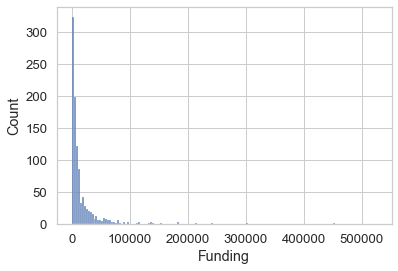

In [92]:
sns.histplot(data=df_under_600, x='Funding')

In [12]:
df_under_100 = df.loc[df['Funding']<100000]
df_under_100.shape

(1012, 28)

<AxesSubplot:xlabel='Funding', ylabel='Count'>

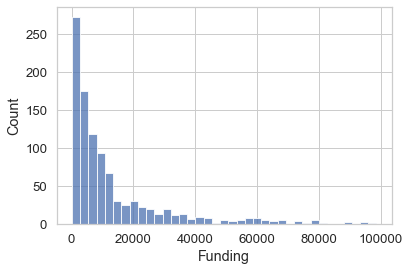

In [13]:
sns.histplot(data=df_under_100, x='Funding')

In [14]:
df_num_under100 = df_under_100[num_features_target]

KeyboardInterrupt: 

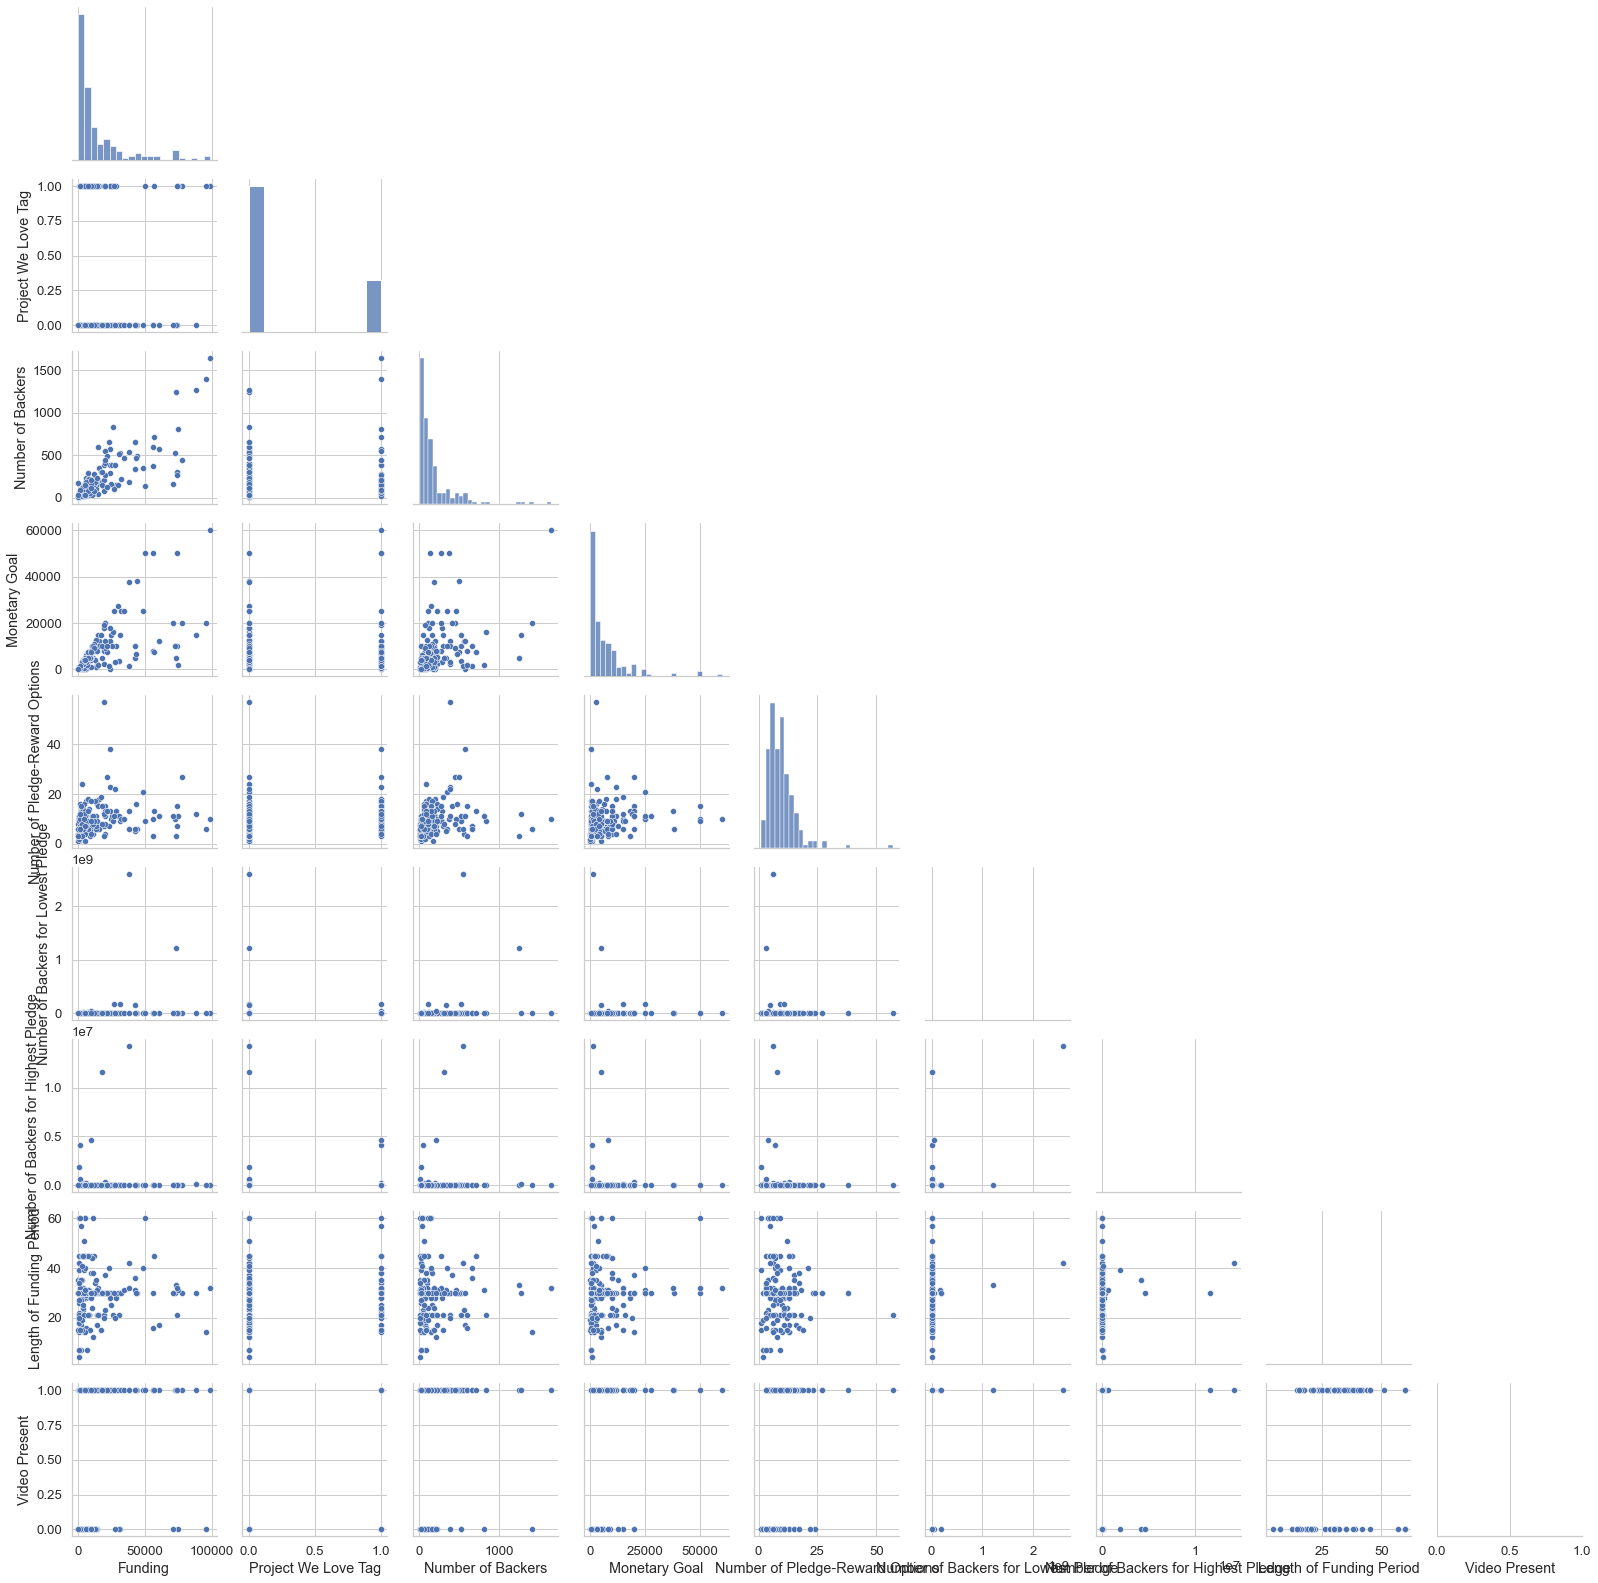

In [15]:
g = sns.PairGrid(df_num_under100.sample(frac=0.2), diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=False)

In [16]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 
        

In [17]:
def vif(df_X):
    '''
    Calculate the VIF for each feature of df_X (a Pandas DataFrame).
    '''
    vif_data = [variance_inflation_factor(df_X.values, i)
                for i in range(df_X.shape[1])]
    
    return pd.Series(vif_data, index=df_X.columns)

In [18]:
vif(df.iloc[:, 1:])

Funding                                 1.841633
Project We Love Tag                     1.665559
Number of Backers                       1.846407
Monetary Goal                           1.187910
Number of Pledge-Reward Options         3.225841
Number of Backers for Lowest Pledge     0.043042
Number of Backers for Highest Pledge   -0.069278
Length of Funding Period                6.140576
Video Present                           3.524359
Northeast                               1.962937
Southeast                               2.094896
Southwest                               1.476344
West                                    2.779583
Comics                                  2.097251
Crafts                                  1.075206
Dance                                   1.020827
Design                                  1.679840
Fashion                                 1.320285
Film & Video                            1.502193
Food                                    1.225690
Games               

# Baseline w/ Only Numeric Features

In [19]:
features, target = ['Project We Love Tag', 'Number of Backers',
       'Monetary Goal', 'Number of Pledge-Reward Options',
       'Number of Backers for Lowest Pledge',
       'Number of Backers for Highest Pledge', 'Length of Funding Period',
       'Video Present'], 'Funding'
X_base, y_base = df[features], df[target]

In [20]:
X_train_base, X_val_base, y_train_base, y_val_base = train_test_split(X_base, y_base, test_size=.25, random_state=42)

In [21]:
lr_base = LinearRegression()
lr_base.fit(X_train_base,y_train_base)
print(lr_base.intercept_)
print(lr_base.coef_)
print(lr_base.score(X_train_base, y_train_base))

-177012.34219862722
[ 5.05980049e+04  1.09676473e+02  1.24291851e+00  1.94124510e+03
 -5.16840674e-06 -8.22939035e-06  4.89770823e+03 -3.25249872e+03]
0.43184353112380736


In [22]:
model = sm.OLS(y_train_base, sm.add_constant(X_train_base)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Funding   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     76.10
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           4.08e-93
Time:                        22:10:20   Log-Likelihood:                -11653.
No. Observations:                 810   AIC:                         2.332e+04
Df Residuals:                     801   BIC:                         2.337e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -1.77e+05   5.14e+04     -3.441      0.001   -2.78e+05    -7.6e+04
Project We Love Tag                    5.06e+04   3.71e+04      1.365      0.173   -2.22e+04    1.23e+05
Number of Backers                      109.6765      4.846     22.634      0.000     100.165     119.188
Monetary Goal                            1.2429      0.406      3.063      0.002       0.446       2.039
Number of Pledge-Reward Options       1941.2451   2633.065      0.737      0.461   -3227.276    7109.767
Number of Backers for Lowest Pledge  -5.168e-06   4.08e-05     -0.127      0.899   -8.53e-05    7.49e-05
Number of Backers for Highest Pledge -8.229e-06   5.14e-05     -0.160      0.873      -0.000    9.26e-05
Length of Funding Period              4897.7082   1393.509      3.515      0.000    2162.348    7633.068
Video Present                        -3252.4987   3.24e+04     -0.100      0.920   -6.69e+04    6.04e+04
==============================================================================
Omnibus:                     2011.657   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         14080769.459
Skew:                          24.231   Prob(JB):                         0.00
Kurtosis:                     647.096   Cond. No.                     1.30e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
print(lr_base.score(X_val_base, y_val_base))

0.41022309038159654


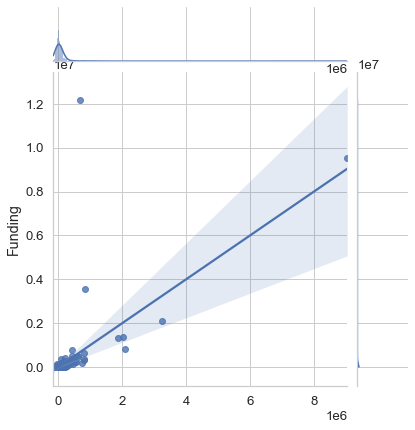

In [24]:
preds = lr_base.predict(X_train_base) # generate predictions (on training data) using fit model

sns.jointplot(x=preds,y=y_train_base, kind='reg')

# OLS w/ numeric features and funding<$100,000

In [24]:
features, target = ['Project We Love Tag', 'Number of Backers',
       'Monetary Goal', 'Number of Pledge-Reward Options',
       'Number of Backers for Lowest Pledge',
       'Number of Backers for Highest Pledge', 'Length of Funding Period',
       'Video Present'], 'Funding'

X_num_under100, y_num_under100 = df_under_100[features], df_under_100[target]

X_train_val_under100, X_test_under100, y_train_val_under100, y_test_under100 = train_test_split(X_num_under100, y_num_under100, test_size=0.2,random_state=42)

In [25]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(X, y, test_size=0.25, random_state=43)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    train_score = lr_model.score(X_train, y_train)
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nTraining R^2 score was:', train_score)
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}') 

In [26]:
split_and_validate(X_train_val_under100, y_train_val_under100)


Training R^2 score was: 0.7767685956754151

Validation R^2 score was: 0.6878813643845307
Feature coefficient results: 

Project We Love Tag : -460.26
Number of Backers : 47.85
Monetary Goal : 0.79
Number of Pledge-Reward Options : -71.36
Number of Backers for Lowest Pledge : 0.00
Number of Backers for Highest Pledge : -0.00
Length of Funding Period : 43.20
Video Present : 174.99


In [111]:
features, target = ['Project Title','Project We Love Tag', 'Number of Backers',
       'Monetary Goal', 'Number of Pledge-Reward Options',
       'Number of Backers for Lowest Pledge',
       'Number of Backers for Highest Pledge', 'Length of Funding Period',
       'Video Present', 'Northeast', 'Southeast', 'Southwest', 'West',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Technology', 'Theater'], 'Funding'

X_under100_AF, y_under100_AF = df_under_100[features], df_under_100[target]

X_train_val_under100_af, X_test_under100_af, y_train_val_under100_af, y_test_under100_af = \
        train_test_split(X_under100_AF, y_under100_AF, test_size=0.2,random_state=42)

X_train, X_val, y_train, y_val = \
        train_test_split(X_train_val_under100_af, y_train_val_under100_af, test_size=0.25, random_state=43)

In [112]:
lr_model = LinearRegression()
fit = lr_model.fit(X_train, y_train)

# score fit model on validation data
train_score = lr_model.score(X_train, y_train)
val_score = lr_model.score(X_val, y_val)

# report results
print('\nTraining R^2 score was:', train_score)
print('\nValidation R^2 score was:', val_score)
print('Feature coefficient results: \n')
for feature, coef in zip(X_under100_AF.columns, lr_model.coef_):
    print(feature, ':', f'{coef:.2f}') 


Training R^2 score was: 0.7900270246940705

Validation R^2 score was: 0.705029865814284
Feature coefficient results: 

Project We Love Tag : 225.69
Number of Backers : 47.92
Monetary Goal : 0.77
Number of Pledge-Reward Options : -26.89
Number of Backers for Lowest Pledge : 0.00
Number of Backers for Highest Pledge : -0.00
Length of Funding Period : 42.42
Video Present : 683.39
Northeast : -1016.07
Southeast : -533.21
Southwest : -418.50
West : 505.66
Comics : -3661.01
Crafts : -798.72
Dance : -1119.21
Design : 1040.12
Fashion : 1565.50
Film & Video : -930.38
Food : -1977.61
Games : -1679.60
Journalism : -9374.44
Music : -2281.06
Photography : -1796.04
Publishing : -2092.01
Technology : 3969.46
Theater : -1768.65


In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
lm = LinearRegression()

cross_val_score(lm, X_under100_AF, y_under100_AF, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2')

array([0.75108287, 0.68472932, 0.75170557, 0.63774799, 0.80500761])

<Figure size 432x288 with 0 Axes>

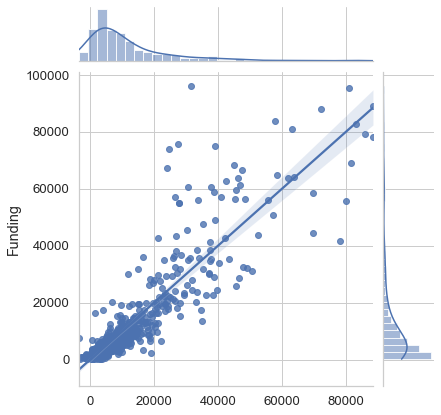

In [115]:
preds = lr_model.predict(X_train) # generate predictions (on training data) using fit model

plt.figure()
sns.jointplot(x=preds,y=y_train, kind='reg')
plt.savefig('lr_under100_af_jointplot.png')

In [116]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Funding')
    g1.set_ylabel('True Funding')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Funding')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

In [123]:
model = sm.OLS(y_train, sm.add_constant(X_train)) 

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Funding   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     83.79
Date:                Fri, 01 Oct 2021   Prob (F-statistic):          3.29e-177
Time:                        00:44:05   Log-Likelihood:                -6295.1
No. Observations:                 606   AIC:                         1.264e+04
Df Residuals:                     579   BIC:                         1.276e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -745.7160   1565.080     -0.476      0.634   -3819.642    2328.210
Project We Love Tag                    225.6920    923.771      0.244      0.807   -1588.658    2040.042
Number of Backers                       47.9166      1.653     28.989      0.000      44.670      51.163
Monetary Goal                            0.7746      0.047     16.340      0.000       0.681       0.868
Number of Pledge-Reward Options        -26.8931     56.625     -0.475      0.635    -138.108      84.322
Number of Backers for Lowest Pledge   1.283e-06    2.9e-06      0.442      0.659   -4.42e-06    6.98e-06
Number of Backers for Highest Pledge -3.652e-06   1.42e-06     -2.566      0.011   -6.45e-06   -8.56e-07
Length of Funding Period                42.4224     31.347      1.353      0.176     -19.146     103.991
Video Present                          683.3931    774.298      0.883      0.378    -837.382    2204.168
Northeast                            -1016.0704   1119.616     -0.908      0.365   -3215.074    1182.933
Southeast                             -533.2050   1086.205     -0.491      0.624   -2666.586    1600.176
Southwest                             -418.4991   1254.729     -0.334      0.739   -2882.874    2045.876
West                                   505.6580   1035.809      0.488      0.626   -1528.743    2540.059
Comics                               -3661.0148   1332.226     -2.748      0.006   -6277.599   -1044.430
Crafts                                -798.7198   3451.466     -0.231      0.817   -7577.638    5980.199
Dance                                -1119.2145   4761.878     -0.235      0.814   -1.05e+04    8233.445
Design                                1040.1202   1566.951      0.664      0.507   -2037.480    4117.720
Fashion                               1565.5005   1497.494      1.045      0.296   -1375.682    4506.683
Film & Video                          -930.3759   1596.092     -0.583      0.560   -4065.212    2204.460
Food                                 -1977.6092   2176.276     -0.909      0.364   -6251.967    2296.749
Games                                -1679.5956   1211.829     -1.386      0.166   -4059.712     700.521
Journalism                           -9374.4448   5847.113     -1.603      0.109   -2.09e+04    2109.692
Music                                -2281.0584   1511.344     -1.509      0.132   -5249.443     687.326
Photography                          -1796.0379   2854.399     -0.629      0.529   -7402.277    3810.201
Publishing                           -2092.0078   1364.265     -1.533      0.126   -4771.519     587.504
Technology                            3969.4571   1879.720      2.112      0.035     277.557    7661.357
Theater                              -

<Figure size 432x288 with 0 Axes>

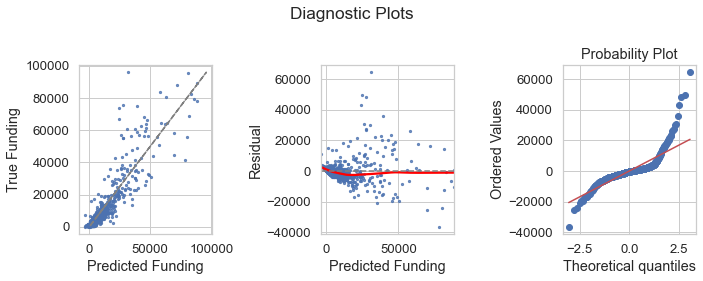

In [119]:
plt.figure()

diagnostic_plots(fit.fittedvalues, y_train, fit.resid)

#plt.savefig('LR_MVP.png')

# Lasso Regression w/ All Features for Rows w/ Funding < $100,000

In [141]:
features, target = ['Project We Love Tag', 'Number of Backers',
       'Monetary Goal', 'Number of Pledge-Reward Options',
       'Number of Backers for Lowest Pledge',
       'Number of Backers for Highest Pledge', 'Length of Funding Period',
       'Video Present', 'Northeast', 'Southeast', 'Southwest', 'West',
       'Comics', 'Crafts', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',
       'Technology', 'Theater'], 'Funding'

X_under100_AF, y_under100_AF = df_under_100[features], df_under_100[target]

X_train_val_under100_af, X_test_under100_af, y_train_val_under100_af, y_test_under100_af = \
        train_test_split(X_under100_AF, y_under100_AF, test_size=0.2,random_state=42)

X_train, X_val, y_train, y_val = \
        train_test_split(X_train_val_under100_af, y_train_val_under100_af, test_size=0.25, random_state=43)

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [78]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [79]:
X_tr = std.transform(X_train.values)
X_va = std.transform(X_val.values)
X_te = std.transform(X_test_under100_af.values)

In [97]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
fit = lasso_model.fit(X_tr, y_train)

In [81]:
lasso_model.alpha_

100.0

In [82]:
list(zip(X_train.columns, lasso_model.coef_))

[('Project We Love Tag', 0.0),
 ('Number of Backers', 11543.394602059418),
 ('Monetary Goal', 6228.40943748236),
 ('Number of Pledge-Reward Options', -39.31069047485822),
 ('Number of Backers for Lowest Pledge', 89.90098964482871),
 ('Number of Backers for Highest Pledge', -738.3208743012103),
 ('Length of Funding Period', 370.9943978565047),
 ('Video Present', 143.06586990710548),
 ('Northeast', -185.28047613933953),
 ('Southeast', -29.332611584891456),
 ('Southwest', -0.0),
 ('West', 368.2349071082653),
 ('Comics', -879.4054506580117),
 ('Crafts', -0.0),
 ('Dance', -0.0),
 ('Design', 441.1721178673874),
 ('Fashion', 486.4113997524836),
 ('Film & Video', 0.0),
 ('Food', -73.44049599362481),
 ('Games', -229.99005381352055),
 ('Journalism', -363.1966323198165),
 ('Music', -293.7848522443035),
 ('Photography', -2.398095691950291),
 ('Publishing', -274.1626260519308),
 ('Technology', 915.9251551661517),
 ('Theater', -0.0)]

In [149]:
train_set_pred = lasso_model.predict(X_tr)
test_set_pred = lasso_model.predict(X_te)

In [150]:
print(mean_absolute_error(y_train, train_set_pred))
print(mean_squared_error(y_train, train_set_pred, squared=False))
print(r2_score(y_train, train_set_pred))

4152.67708545691
7874.4498403488205
0.7890182012731943


In [110]:
print(mean_absolute_error(y_test_under100_af, test_set_pred))
print(mean_squared_error(y_test_under100_af, test_set_pred, squared=False))
print(r2_score(y_test_under100_af, test_set_pred))

4910.485683769612
9178.025641984917
0.7497148879310538


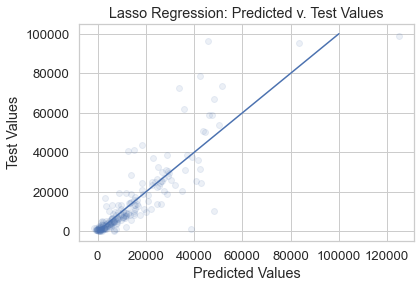

In [96]:
plt.scatter(test_set_pred, y_test_under100_af, alpha=.1)
plt.plot(np.linspace(0,100000,1000), np.linspace(0,100000,1000))
plt.title('Lasso Regression: Predicted v. Test Values')
plt.xlabel('Predicted Values')
plt.ylabel('Test Values')
plt.savefig('Lasso_scatter.png', transparent=True, bbox_inches='tight' )

<AxesSubplot:title={'center':'Model Coefficients'}>

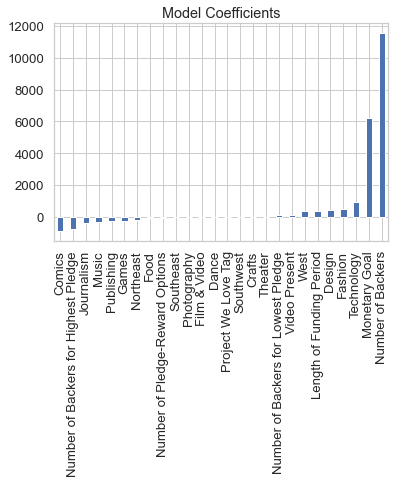

In [145]:
predictors = X_train.columns

coef = pd.Series(lasso_model.coef_,predictors).sort_values()

coef.plot(kind='bar', title='Model Coefficients')
